In [3]:
import matplotlib.pyplot as plt
import cv2
import numpy as np

import ritm_api.inference as inference

### 모델 로드

In [5]:
IS = inference.ISController(ckpt_path='misc/ritm_preset_model.pth')

### 라벨링 대상 이미지 등록

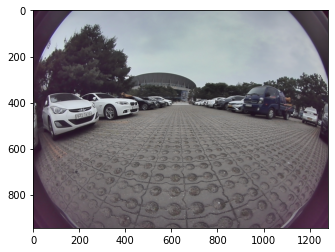

In [6]:
sample_img = cv2.imread("misc/sample_img_1.png")
sample_img = cv2.cvtColor(sample_img, cv2.COLOR_BGR2RGB)

IS.set_image(sample_img)

plt.imshow(sample_img)
plt.show()

### 초기화 마스크 설정(선택)
- AI-assit 결과를 수정할 때
- 이전에 작업한 객체를 이어서 수정할 때

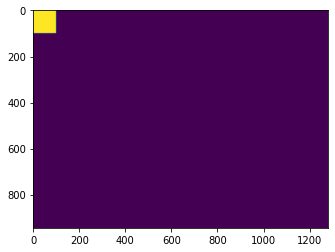

In [7]:
sample_init_mask = np.zeros(sample_img.shape[:2])
sample_init_mask[:100, :100] = 0.5
IS.set_init_mask(sample_init_mask)

plt.imshow(sample_init_mask)
plt.show()

### click interaction 입력으로 세그멘테이션 마스크 얻기

/home/home/datalab/Milla/ritm_interactive_segmentation/isegm/inference/predictors/base.py:46: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  prev_mask = torch.tensor(init_mask).unsqueeze(0).unsqueeze(0)


iteration:  1


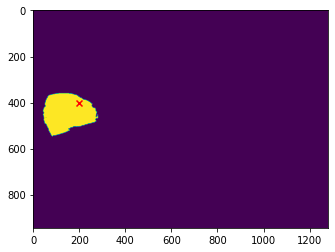

iteration:  2


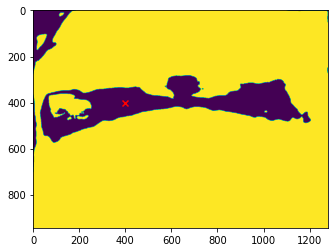

iteration:  3


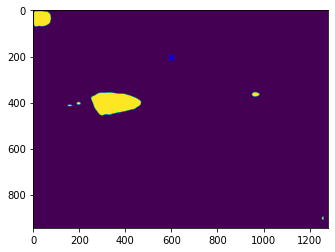

In [8]:
# 첫번째 클릭 (작업 대상 객체 클릭)
click_x, click_y = [200, 400]
phase1 = IS.predict_mask([click_x, click_y], is_positive=True)
print("iteration: ", IS.iteration)
plt.imshow(phase1)
plt.scatter(click_x, click_y, c='r', marker='x')
plt.show()

# 두번째 클릭 (언더바운딩 영역 클릭)
click_x, click_y = [400, 400]
phase2 = IS.predict_mask([click_x, click_y], is_positive=True)
print("iteration: ", IS.iteration)
plt.imshow(phase2)
plt.scatter(click_x, click_y, c='r', marker='x')
plt.show()

# 세번째 클릭 (오버바운딩 영역 클릭)
click_x, click_y = [600, 200]
phase3 = IS.predict_mask([click_x, click_y], is_positive=False)
print("iteration: ", IS.iteration)
plt.imshow(phase3)
plt.scatter(click_x, click_y, c='b', marker='x')
plt.show()


### 이전 마스크로 되돌리기

iteration:  2


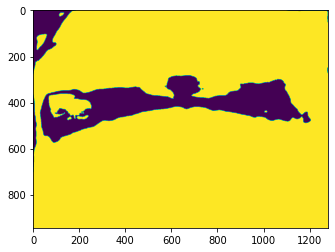

iteration:  1


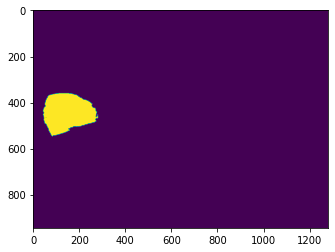

iteration:  0


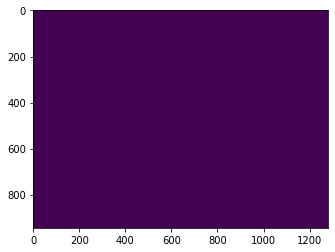

In [9]:
phase4 = IS.undo_click()
print("iteration: ", IS.iteration)
plt.imshow(phase4)
plt.show()

phase5 = IS.undo_click()
print("iteration: ", IS.iteration)
plt.imshow(phase5)
plt.show()

phase6 = IS.undo_click()
print("iteration: ", IS.iteration)
plt.imshow(phase6)
plt.show()

### 객체 한 개 작업 완료하기

iteration:  1


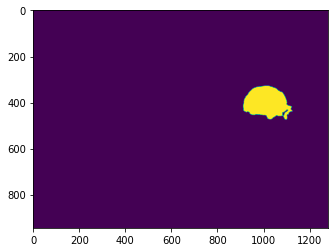

In [10]:
IS.finish_object()

# 다음 인스턴스 이어서 클릭
click_x, click_y = [1000, 400]
phase1 = IS.predict_mask([click_x, click_y], is_positive=True)
print("iteration: ", IS.iteration)
plt.imshow(phase1)
plt.show()


### 이미지 한 장 작업 완료하기

In [15]:
IS.finish_image()

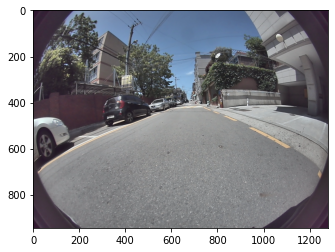

iteration:  2


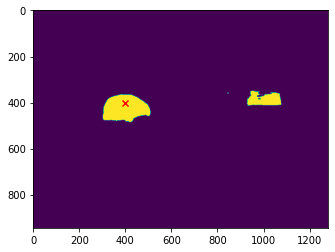

In [11]:
# 새로운 이미지 작업
sample_img = cv2.imread("misc/sample_img_2.png")
sample_img = cv2.cvtColor(sample_img, cv2.COLOR_BGR2RGB)

IS.set_image(sample_img)

plt.imshow(sample_img)
plt.show()
click_x, click_y = [400, 400]
phase1 = IS.predict_mask([click_x, click_y], is_positive=True)
print("iteration: ", IS.iteration)
plt.imshow(phase1)
plt.scatter(click_x, click_y, c='r', marker='x')
plt.show()
